In [11]:
# This code block is used to access your google drive
from google.colab import drive
ROOT = "/content/drive"
drive.mount(ROOT)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Make sure this points to the project folder

%cd drive/'My Drive'/ECE590-Final-Project

[Errno 2] No such file or directory: 'drive/My Drive/ECE590-Final-Project'
/content/drive/My Drive/ECE590-Final-Project


In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
from __future__ import print_function, division

import random

import torch, gc
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
from PIL import Image
from torch.utils.tensorboard import SummaryWriter

from tools.data_loader import *
from tools.training_utils import *

# Ensure deterministic behavior
torch.backends.cudnn.deterministic = True
random.seed(hash("setting random seeds") % 2**32 - 1)
np.random.seed(hash("improves reproducibility") % 2**32 - 1)
torch.manual_seed(hash("by removing stochasticity") % 2**32 - 1)
torch.cuda.manual_seed_all(hash("so runs are repeatable") % 2**32 - 1)

plt.ion()

In [15]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [16]:
#Configuration for run

LOG_DIR = '/content/drive/My Drive/ECE590-Final-Project/runs'
INITIAL_LR = 0.01
os.makedirs(LOG_DIR, exist_ok=True)
writer = SummaryWriter('/content/drive/My Drive/ECE590-Final-Project/runs/images')



In [17]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

image_index_file_location = '/content/drive/My Drive/ECE590-Final-Project/Data/image_index_v3.csv'
data_dir = '/content/drive/My Drive/ECE590-Final-Project/Data/'


image_datasets = {x: LoadDataset(text_file =image_index_file_location, root_dir = data_dir,
                                 transform=data_transforms[x],train_or_val=x)
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=64,
                                             shuffle=True, num_workers=2)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [18]:
# Get a batch of training data
result = next(iter(dataloaders['train']))
inputs, classes = result['image'],result['labels']

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

#imshow(out, title=[class_names[x] for x in classes])

# write to tensorboard
writer.add_image('car_damage_images', out)
writer.flush()

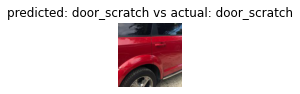

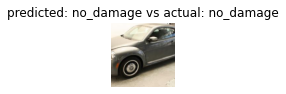

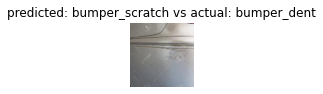

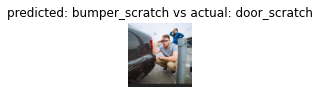

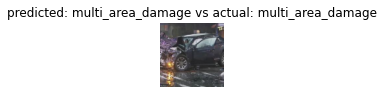

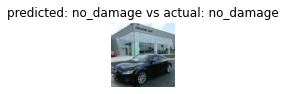

In [ ]:
visualize_model(model_ft, num_images=6)

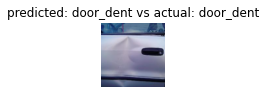

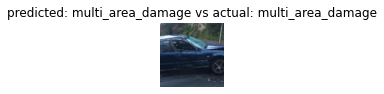

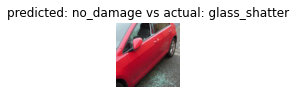

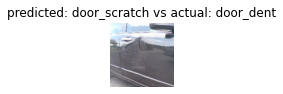

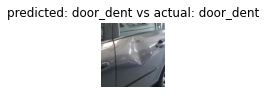

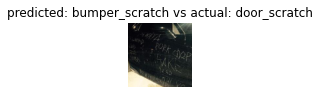

In [ ]:
visualize_model(model_conv)

plt.ioff()
plt.show()

## Training models

In [19]:
#,'wide_resnet50_2','vgg19_bn','resnet18','resnet50','resnext101_32x8d'
#'hybridfixedfeatures','fixedfeatures', #'hybridfixedfeatures' RUN ADAM for. vgg
results_models_2 = train_multiple_variants( inputs = inputs, device = device, 
                                            writer_path = '/content/drive/My Drive/ECE590-Final-Project/runs',
                                            pretrained_model_name=['vgg19_bn','wide_resnet50_2','vgg19_bn','resnet18','resnet50','resnext101_32x8d'],
                                            variant=['hybridfixedfeatures'], 
                                            number_of_classes= len(class_names),
                                            INITIAL_LR=[0.1,0.01,0.001],
                                            number_of_pochs=25, 
                                            CHECKPOINT_PATH="/content/drive/My Drive/ECE590-Final-Project/saved_models",
                                            step_after = 7,
                                            proportion_fixed = 0.5,
                                            optimization=['ADAM'],
                                            dataset_sizes=dataset_sizes,
                                            train_from_scratch = True,
                                            image_index_file_location = '/content/drive/My Drive/ECE590-Final-Project/Data/image_index_v3.csv',
                                            data_dir = '/content/drive/My Drive/ECE590-Final-Project/Data/'
                                          )

Starting to train model: vgg19_bn_hybridfixedfeatures_ADAM_0pt1.h5
Epoch 0/24
----------
train Loss: 1061.6828 Acc: 0.8606
val Loss: 10.2527 Acc: 0.9679
Saving ...

Epoch 1/24
----------
train Loss: 6.1054 Acc: 0.8904
val Loss: 1.9084 Acc: 0.9679

Epoch 2/24
----------
train Loss: 0.9069 Acc: 0.8943
val Loss: 18.2239 Acc: 0.9675

Epoch 3/24
----------
train Loss: 2.7275 Acc: 0.8908
val Loss: 3.7111 Acc: 0.9679

Epoch 4/24
----------
train Loss: 0.6843 Acc: 0.8944
val Loss: 5.7271 Acc: 0.9679

Epoch 5/24
----------
train Loss: 4.2657 Acc: 0.8960
val Loss: 0.2342 Acc: 0.9679

Epoch 6/24
----------
train Loss: 1.0339 Acc: 0.8969
val Loss: 0.5479 Acc: 0.9679

Epoch 7/24
----------
train Loss: 0.7218 Acc: 0.8971
val Loss: 0.2376 Acc: 0.9679

Epoch 8/24
----------
train Loss: 1.1159 Acc: 0.8968
val Loss: 0.5642 Acc: 0.9679

Epoch 9/24
----------
train Loss: 0.5387 Acc: 0.8971
val Loss: 2.0007 Acc: 0.9679

Epoch 10/24
----------
train Loss: 1.0230 Acc: 0.8969
val Loss: 0.2635 Acc: 0.9679

Epo

## Load Models

In [ ]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

image_index_file_location = '/content/drive/My Drive/ECE590-Final-Project/Data/image_index_v3.csv'
data_dir = '/content/drive/My Drive/ECE590-Final-Project/Data/'


image_datasets = {x: LoadDataset(text_file =image_index_file_location, root_dir = data_dir,
                                 transform=data_transforms[x],train_or_val=x)
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=256,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['val'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [22]:
model_ft, input_size = initialize_model(model_name = 'wide_resnet50_2', 
                                        num_classes = len(class_names), 
                                        feature_extract='hybridfixedfeatures', 
                                        use_pretrained=True,
                                        proportion_fixed=0.5)


In [ ]:
model_ft, start_epoch, current_learning_rate = load_training_starting_point(model_ft,
                                                                         CKPT_PATH="/content/drive/My Drive/ECE590-Final-Project/saved_models/wide_resnet50_2_hybridfixedfeatures_SGD_0pt01.h5",
                                                                         train_from_scratch = False,
                                                                         INITIAL_LR = 0.01)

model_ft = model_ft.to(device)

In [ ]:
## Get predictions
actual_labels, pred_labels = visualize_model(model_ft,device,dataloaders,class_names, num_images=6,return_only_images=False)